In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [82]:
def display_graph(g):
    elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 5]
    esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 5]

    pos = nx.spring_layout(g)  # positions for all nodes

    plt.figure(figsize=(13,13))


    # nodes
    nx.draw_networkx_nodes(g, pos, node_size=700, node_color = 'lightskyblue')

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(g, pos, edgelist=esmall,
                           width=2, alpha=0.5, edge_color='b')

    # labels
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show()

    return None

In [3]:
def standardize_names(g):

    new_names = {'BlackWidow':'Black_Widow',
             'Captin_America':'Captain_America','CaptainAmerica':'Captain_America',
             'Clint_Barton':'Hawkeye',
             'Iron_Man':'IronMan',
             'NickFury':'Nick_Fury',
             'ScarletWitch':'Scarlet_Witch',
             'WarMachine':'War_Machine'}

    fixes = set(new_names.keys()) - set(g.nodes())
    
    for fix in fixes:
        del new_names[fix]
        
    return nx.relabel_nodes(g, new_names)

In [4]:
def combine_weighted_graphs(g,h):
    ''' Need special function to combined graphs with weighted edges where you want the weights of edges
    in both graphs to be added together'''
    
    combined = nx.Graph()

    # standardize edge name ordering
    g_edges = [tuple(sorted(x)) for x in g.edges]
    h_edges = [tuple(sorted(x)) for x in h.edges]
  
    add_weights_edges = set(g_edges) & set(h_edges)
    
    for edge in add_weights_edges:
        weight = g[edge[0]][edge[1]]['weight'] + h[edge[0]][edge[1]]['weight']
        combined.add_edge(edge[0], edge[1], weight=weight)
   
    # edges in g not in h
    unique_edges = set(g_edges) - set(h_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=g[edge[0]][edge[1]]['weight'])

    # edges in h not in g
    unique_edges = set(h_edges) - set(g_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=h[edge[0]][edge[1]]['weight'])
                       
    return combined

In [5]:
a1 = nx.read_edgelist('Avengers1_edge_list.txt', data=(('weight',float),))
a2 = nx.read_edgelist("Avengers2_edge_list.txt", data=(('weight',float),))
sm1 = nx.read_edgelist("Spider-Man_Homecoming_edge_list.txt", data=(('weight',float),))
tr = nx.read_edgelist("Thor_Ragnarok_edge_list.txt", data=(('weight',float),))

In [6]:
a1 = standardize_names(a1)
a2 = standardize_names(a2)
sm1 = standardize_names(sm1)
tr = standardize_names(tr)

In [7]:
combined = combine_weighted_graphs(a1, a2)
c2 = combine_weighted_graphs(combined, sm1)
c3 = combine_weighted_graphs(c2, tr)

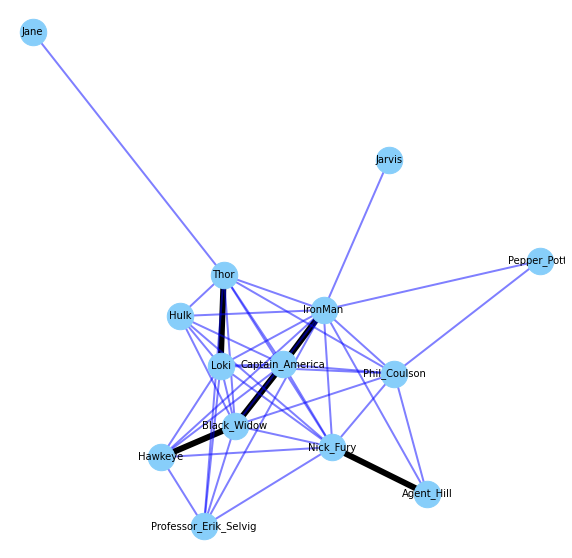

In [74]:
display_graph(a1)

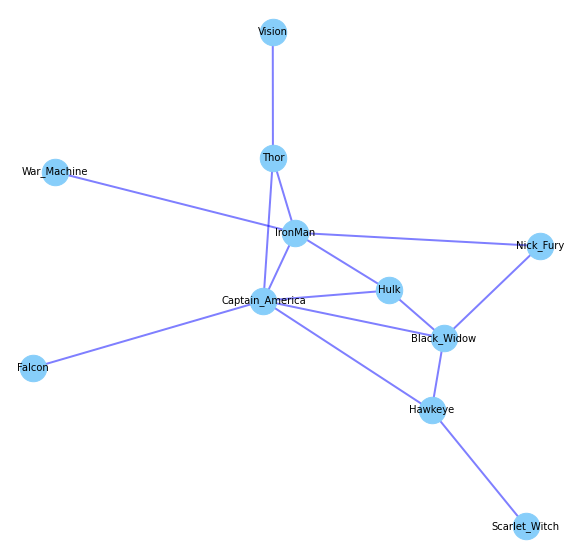

In [78]:
display_graph(a2)

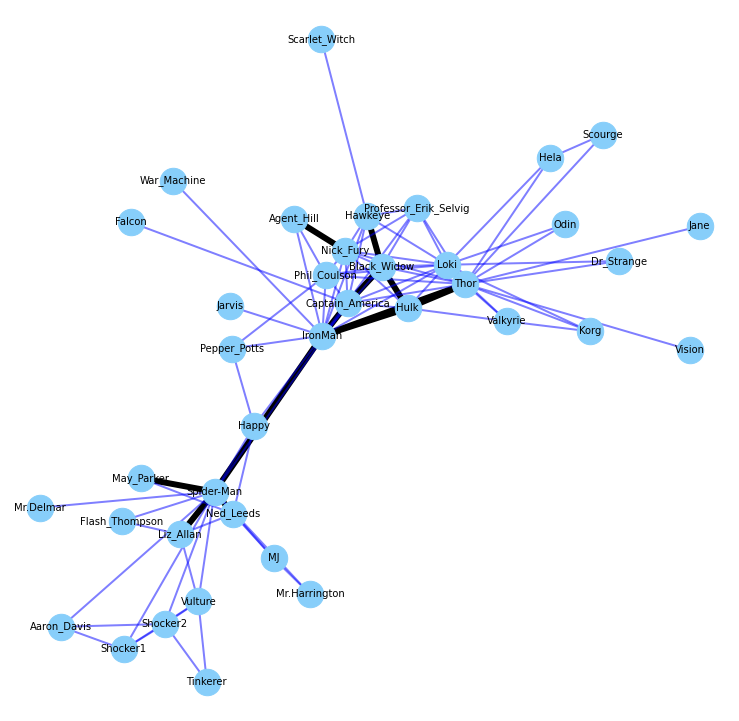

In [84]:
display_graph(c3)

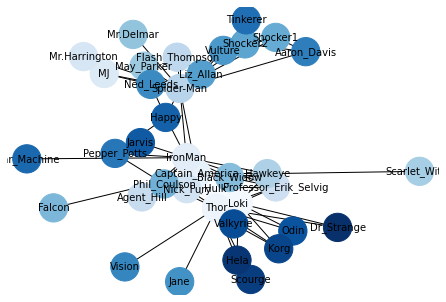

In [73]:
pos = nx.spring_layout(c3)
nx.draw(c3, pos, node_color=range(38), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_labels(c3, pos, font_size=10, font_family='sans-serif')
plt.show()

In [11]:
c3.nodes

NodeView(('Hulk', 'Loki', 'Thor', 'Captain_America', 'IronMan', 'MJ', 'Mr.Harrington', 'Nick_Fury', 'Professor_Erik_Selvig', 'Agent_Hill', 'Flash_Thompson', 'Spider-Man', 'Hawkeye', 'Scarlet_Witch', 'May_Parker', 'Mr.Delmar', 'Black_Widow', 'Falcon', 'Phil_Coulson', 'Shocker1', 'Shocker2', 'Liz_Allan', 'Vulture', 'Jane', 'Ned_Leeds', 'Vision', 'Aaron_Davis', 'Pepper_Potts', 'Tinkerer', 'War_Machine', 'Happy', 'Jarvis', 'Odin', 'Valkyrie', 'Korg', 'Scourge', 'Hela', 'Dr_Strange'))

In [24]:
a1anda2nodes = []
for element in a1:
    if element in a2:
        a1anda2nodes.append(element)
a1anda2nodes

['Nick_Fury',
 'Hawkeye',
 'Black_Widow',
 'IronMan',
 'Hulk',
 'Captain_America',
 'Thor']

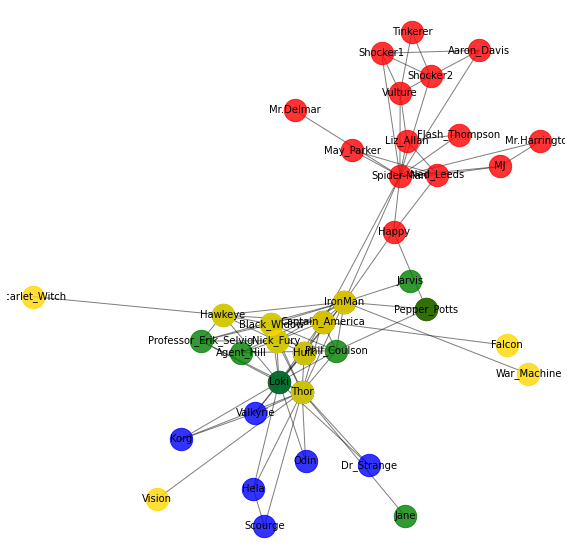

In [34]:
pos=nx.spring_layout(c3) # positions for all nodes
nodes_spiderman = list(sm1.nodes())
nodes_thorrag = list(tr.nodes())
nodes_avengers1 = list(a1.nodes())
nodes_avengers2 = list(a2.nodes())
# nodes
#Spider-Man
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(c3,pos,
                       #nodelist=['Spider-Man','Flash_Thompson','MJ','Mr.Harrington','May_Parker','Mr.Delmar','Shocker1', 'Shocker2','Liz_Allan', 'Vulture','Ned_Leeds','Aaron_Davis','Tinkerer'],
                       nodelist = nodes_spiderman,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#Thor
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_thorrag,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
#Avengers 1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers1,
                       node_color='g',
                       node_size=500,
                   alpha=0.8)
#Avengers 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers2,
                       node_color='gold',
                       node_size=500,
                   alpha=0.8)

nx.draw_networkx_edges(c3,pos,width=1.0,alpha=0.5)

nx.draw_networkx_labels(c3, pos, font_size=10, font_family='sans-serif')

plt.axis('off')

plt.show()

In [25]:
a1andsm1nodes = []
for element in a1:
    if element in sm1:
        a1andsm1nodes.append(element)
a1andsm1nodes

['IronMan', 'Captain_America', 'Pepper_Potts']

In [26]:
a1andtrnodes = []
for element in a1:
    if element in tr:
        a1andtrnodes.append(element)
a1andtrnodes

['Loki', 'Hulk', 'Thor']

In [27]:
a1a2andsm1nodes = []
for element in a1anda2nodes:
    if element in sm1:
        a1a2andsm1nodes.append(element)
a1a2andsm1nodes

['IronMan', 'Captain_America']

In [28]:
a1a2andtrnodes = []
for element in a1anda2nodes:
    if element in tr:
        a1a2andtrnodes.append(element)
a1a2andtrnodes

['Hulk', 'Thor']

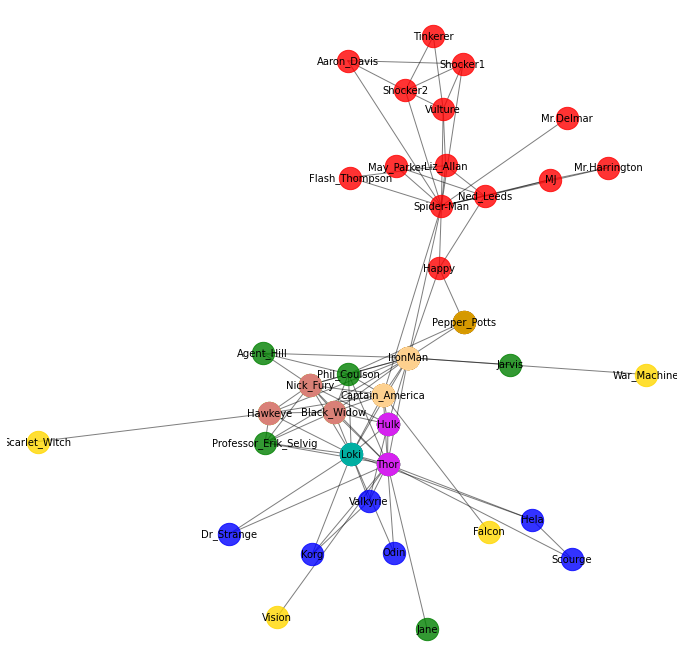

In [33]:
pos=nx.spring_layout(c3) # positions for all nodes
nodes_spiderman = list(sm1.nodes())
nodes_thorrag = list(tr.nodes())
nodes_avengers1 = list(a1.nodes())
nodes_avengers2 = list(a2.nodes())
# nodes
#Spider-Man
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(c3,pos,
                       #nodelist=['Spider-Man','Flash_Thompson','MJ','Mr.Harrington','May_Parker','Mr.Delmar','Shocker1', 'Shocker2','Liz_Allan', 'Vulture','Ned_Leeds','Aaron_Davis','Tinkerer'],
                       nodelist = nodes_spiderman,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#Thor
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_thorrag,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
#Avengers 1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers1,
                       node_color='g',
                       node_size=500,
                   alpha=0.8)
#Avengers 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers2,
                       node_color='gold',
                       node_size=500,
                   alpha=0.8)
#Avengers 1 & 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1anda2nodes,
                       node_color='palevioletred',
                       node_size=500,
                   alpha=0.8)
#Avengers 1 and sm
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1andsm1nodes,
                       node_color='orange',
                       node_size=500,
                   alpha=0.8)
#Avengers1 and tr
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1andtrnodes,
                       node_color='c',
                       node_size=500,
                   alpha=0.8)
#A1,A2, and Sm1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1a2andsm1nodes,
                       node_color='navajowhite',
                       node_size=500,
                   alpha=0.8)
#A1,A2,and tr
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1a2andtrnodes,
                       node_color='magenta',
                       node_size=500,
                   alpha=0.8)


nx.draw_networkx_edges(c3,pos,width=1.0,alpha=0.5)

nx.draw_networkx_labels(c3, pos, font_size=10, font_family='sans-serif')

plt.axis('off')

plt.show()

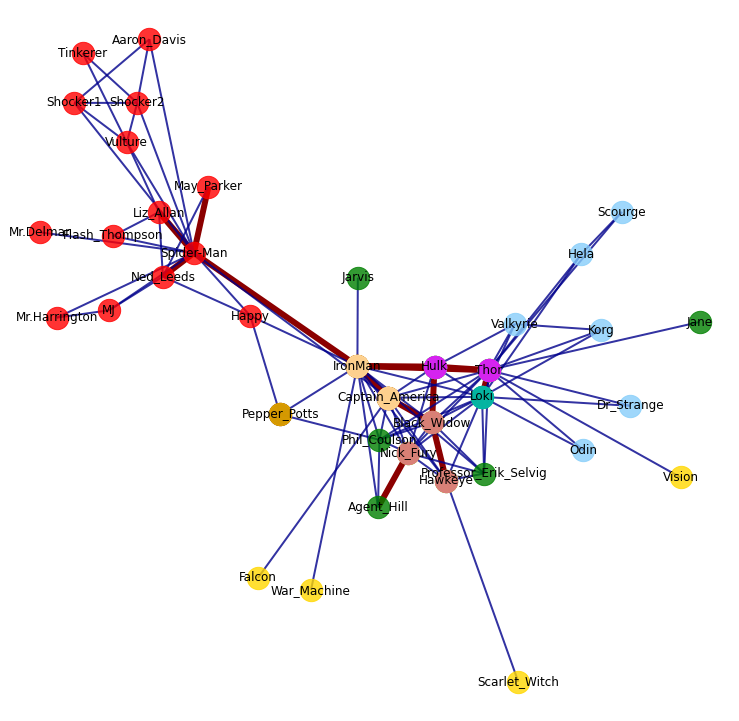

In [69]:
pos=nx.spring_layout(c3) # positions for all nodes
nodes_spiderman = list(sm1.nodes())
nodes_thorrag = list(tr.nodes())
nodes_avengers1 = list(a1.nodes())
nodes_avengers2 = list(a2.nodes()) 

elarge = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] > 5]
#emedium = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] >= 3 ]
esmall = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] <= 5]

# nodes
#Spider-Man
plt.figure(figsize=(13,13))
nx.draw_networkx_nodes(c3,pos,
                       #nodelist=['Spider-Man','Flash_Thompson','MJ','Mr.Harrington','May_Parker','Mr.Delmar','Shocker1', 'Shocker2','Liz_Allan', 'Vulture','Ned_Leeds','Aaron_Davis','Tinkerer'],
                       nodelist = nodes_spiderman,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#Thor
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_thorrag,
                       node_color='lightskyblue',
                       node_size=500,
                   alpha=0.8)
#Avengers 1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers1,
                       node_color='g',
                       node_size=500,
                   alpha=0.8)
#Avengers 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers2,
                       node_color='gold',
                       node_size=500,
                   alpha=0.8)
#Avengers 1 & 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1anda2nodes,
                       node_color='palevioletred',
                       node_size=500,
                   alpha=0.8)
#Avengers 1 and sm
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1andsm1nodes,
                       node_color='orange',
                       node_size=500,
                   alpha=0.8)
#Avengers1 and tr
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1andtrnodes,
                       node_color='c',
                       node_size=500,
                   alpha=0.8)
#A1,A2, and Sm1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1a2andsm1nodes,
                       node_color='navajowhite',
                       node_size=500,
                   alpha=0.8)
#A1,A2,and tr
nx.draw_networkx_nodes(c3,pos,
                       nodelist=a1a2andtrnodes,
                       node_color='magenta',
                       node_size=500,
                   alpha=0.8)


nx.draw_networkx_edges(c3, pos, edgelist=elarge,
                           width=6, edge_color='darkred')
#nx.draw_networkx_edges(c3, pos, edgelist=emedium,
                         #  width=4,alpha=0.5, edge_color='pink')
nx.draw_networkx_edges(c3, pos, edgelist=esmall,
                           width=2, alpha=0.8, edge_color='darkblue')

nx.draw_networkx_labels(c3, pos, font_size=12, font_family='sans-serif')

plt.axis('off')

plt.show()

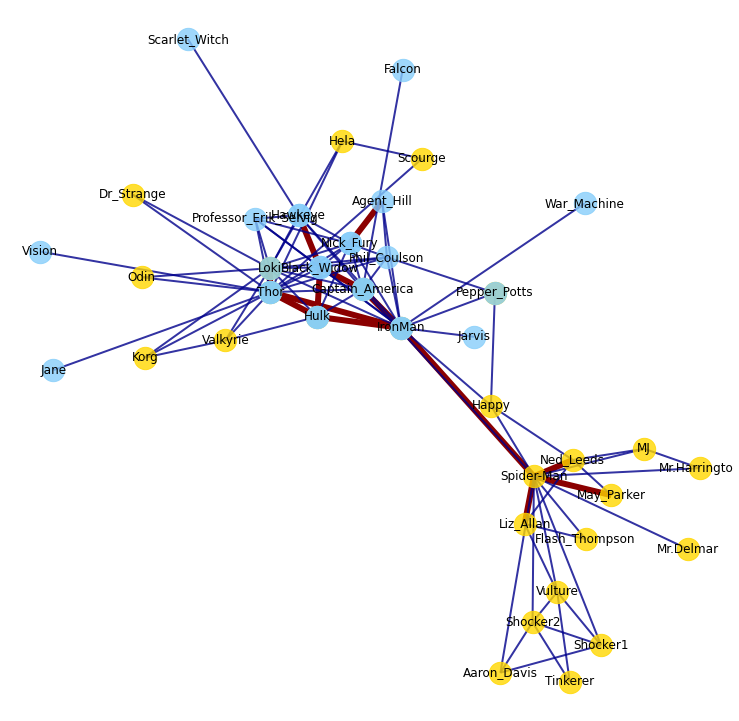

In [70]:
pos=nx.spring_layout(c3) # positions for all nodes
nodes_spiderman = list(sm1.nodes())
nodes_thorrag = list(tr.nodes())
nodes_avengers1 = list(a1.nodes())
nodes_avengers2 = list(a2.nodes()) 

elarge = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] > 5]
#emedium = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] >= 3 ]
esmall = [(u, v) for (u, v, d) in c3.edges(data=True) if d['weight'] <= 5]

# nodes
#Spider-Man
plt.figure(figsize=(13,13))
nx.draw_networkx_nodes(c3,pos,
                       #nodelist=['Spider-Man','Flash_Thompson','MJ','Mr.Harrington','May_Parker','Mr.Delmar','Shocker1', 'Shocker2','Liz_Allan', 'Vulture','Ned_Leeds','Aaron_Davis','Tinkerer'],
                       nodelist = nodes_spiderman,
                       node_color='gold',
                       node_size=500,
                   alpha=0.8)
#Thor
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_thorrag,
                       node_color='gold',
                       node_size=500,
                   alpha=0.8)
#Avengers 1
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers1,
                       node_color='lightskyblue',
                       node_size=500,
                   alpha=0.8)
#Avengers 2
nx.draw_networkx_nodes(c3,pos,
                       nodelist=nodes_avengers2,
                       node_color='lightskyblue',
                       node_size=500,
                   alpha=0.8)



nx.draw_networkx_edges(c3, pos, edgelist=elarge,
                           width=6, edge_color='darkred')
#nx.draw_networkx_edges(c3, pos, edgelist=emedium,
                         #  width=4,alpha=0.5, edge_color='pink')
nx.draw_networkx_edges(c3, pos, edgelist=esmall,
                           width=2, alpha=0.8, edge_color='darkblue')

nx.draw_networkx_labels(c3, pos, font_size=12, font_family='sans-serif')

plt.axis('off')

plt.show()